<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/1200px-Plotly-logo-01-square.png" width="25%" height="25%" />

# Plotly - Unit 03 - Plots: Part 02

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn and deliver bar plot, scatter plot, scatter plot 3D and parallel plots in Plotly



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Plotly Plots: Part 02

In this unit we will explore and learn multiple use cases in Plotly to deliver:
* Bar plot
* Scatter plot
* Scatter plot 3D
* Scatter Matrix 
* Parallel plots

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Bar Plot

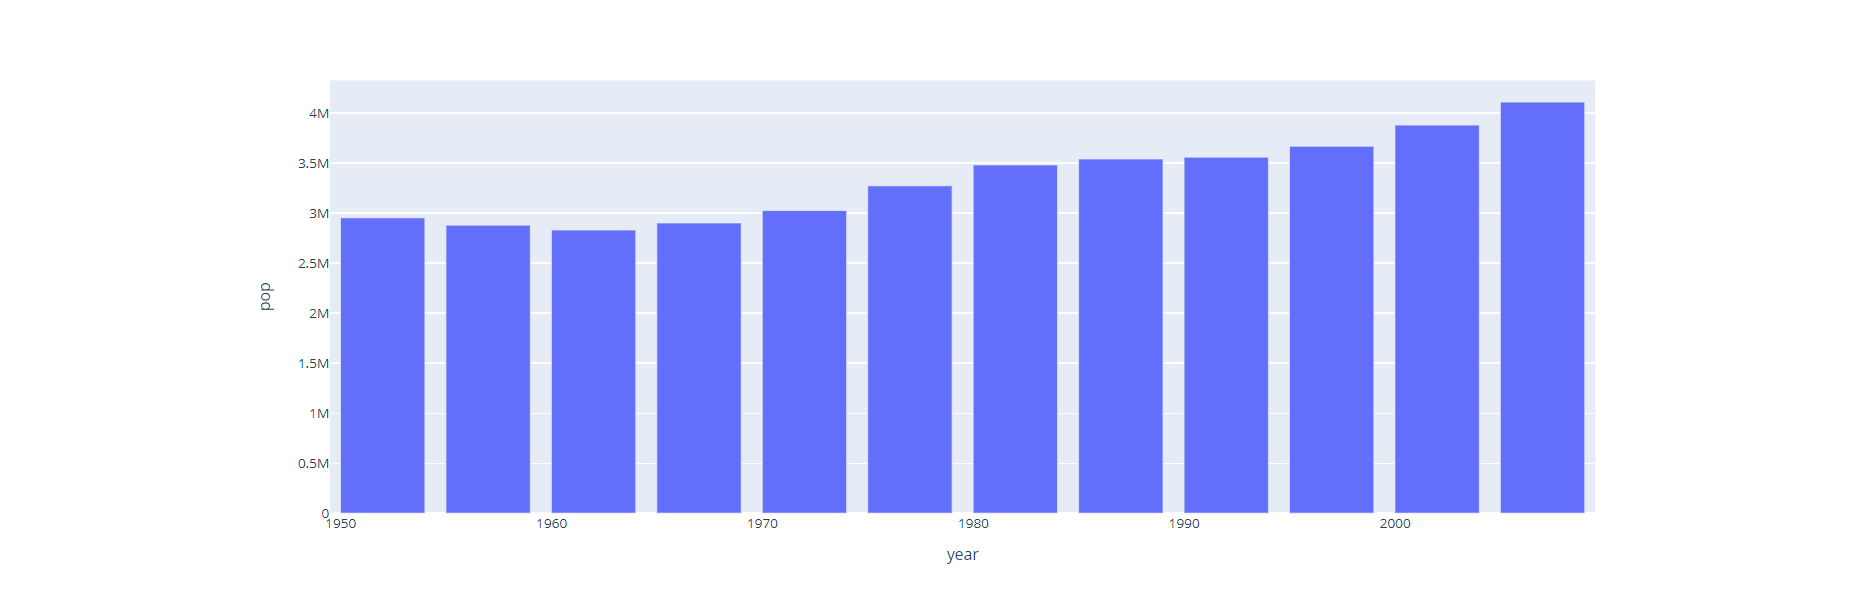

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We are already familiar with what information a bar plot provides.

* Consider the ``gapminder`` dataset; it has records on population, Gross Domestic Product, life expectancy for more than 140 countries. Each row represents a country for a given year
* We are querying data for Ireland

df = px.data.gapminder().query("country == 'Ireland'")
df.head()

We want to plot population levels over the years. We use `px.bar()`, its documentation is [here](https://plotly.com/python-api-reference/generated/plotly.express.bar). The arguments are data_frame, x the groups you are interested and y the counts of you want to display
* Can you see any trend (upwards or downwards)?



fig = px.bar(df, x='year', y='pop')
fig.show()

Consider another dataset, and it shows records of medals for sports for given countries

df = px.data.medals_long()
df

We want to check the performance of each nation in terms of different types of medals.
* We use `px.bar()`, where the axis x holds nation, y the count of medals, and the bar is colored by the medal type.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note that the data considered here is like a "summary" since it counts medals per medal type per nation. You don't have repeated rows for the same combination of variables.

fig = px.bar(df, x="nation", y="count", color="medal", title="Long-Form Input")
fig.show()

---

Now consider the tips dataset. It holds records for waiter tips, based on the day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were in the table

df = px.data.tips()
df = df.sample(n=50, random_state=1)
df.head(3)

We want to know how many Females and Males we have in the dataset. We use `px.bar()` and set x='sex'. 
* Note that several rows share the same value of x (in this case, `sex` variable: female or male). The rectangles are stacked on top of one another by default.

fig = px.bar(df, x="sex")
fig.show()

If you prefer, you could process the data before plotting, in this case, with `.value_counts()` since you are using only one variable. Once you do a value count, you transform it to dataframe with `.to_frame()`

df_processed = df['sex'].value_counts().to_frame()
df_processed

We plot the DataFrame above with `px.bar()`

fig = px.bar(data_frame=df_processed, y="sex")
fig.show()

---

In both previous cases, you are counting how many females and males you have in the dataset.
* However, you may be interested in counting the levels of `tip` (numerical variable) per `sex`. You can add the argument `y` and set it to `tip`

fig = px.bar(df, x="sex", y='tip')
fig.show()

If you prefer, you could process the data before plotting, in this case, with `groupby()` and aggregate by `.sum()` and `.reset_index()`, since you have 2 variables

df_processed = df[['sex','tip']].groupby('sex').sum().reset_index()
df_processed

You may plot using the processed data frame
* Note the mini stacked data is not present anymore

fig = px.bar(data_frame=df_processed, x="sex", y='tip')
fig.show()

---

You may be interesed to color your bar plot by another categorical variable. You can do that with the `color` argument
* The barmode allows you to stack them (`stack`), or leave side by side (`group`)

fig = px.bar(df, x="sex",  color="smoker", barmode="stack")
fig.show()

The example below has the same code from previous cell, but uses `barmode='group'`

fig = px.bar(df, x="sex", color="smoker", barmode="group")
fig.show()

---

As usual, you can facet your plot, using face_row and facet_col.
* In this plot, you want to see multiple bar plots, displaying the count of Female and Male, per day, per time and per smoker status

fig = px.bar(data_frame=df, x="sex", color="smoker", barmode="group",
             facet_row="time", facet_col="day")
fig.show()

You will notice the days of the week are not ordered in a conventional way.
* You can manually arrange the order for your categorical variables in your plot with `category_orders` just parse a dictionary, where the `key` is the variable name, and the `values` are the order you want.

fig = px.bar(data_frame=df, x="sex", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})

fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the penguins dataset to practice with.

df_practice = sns.load_dataset('penguins').sample(n=150, random_state=1)
df_practice.head()

Feel free to try out your ideas or use the following suggestion.

You are interested in using a bar plot. You decide to learn the species count colored by island in a stacked bar plot

# write your code here

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scatter Plot

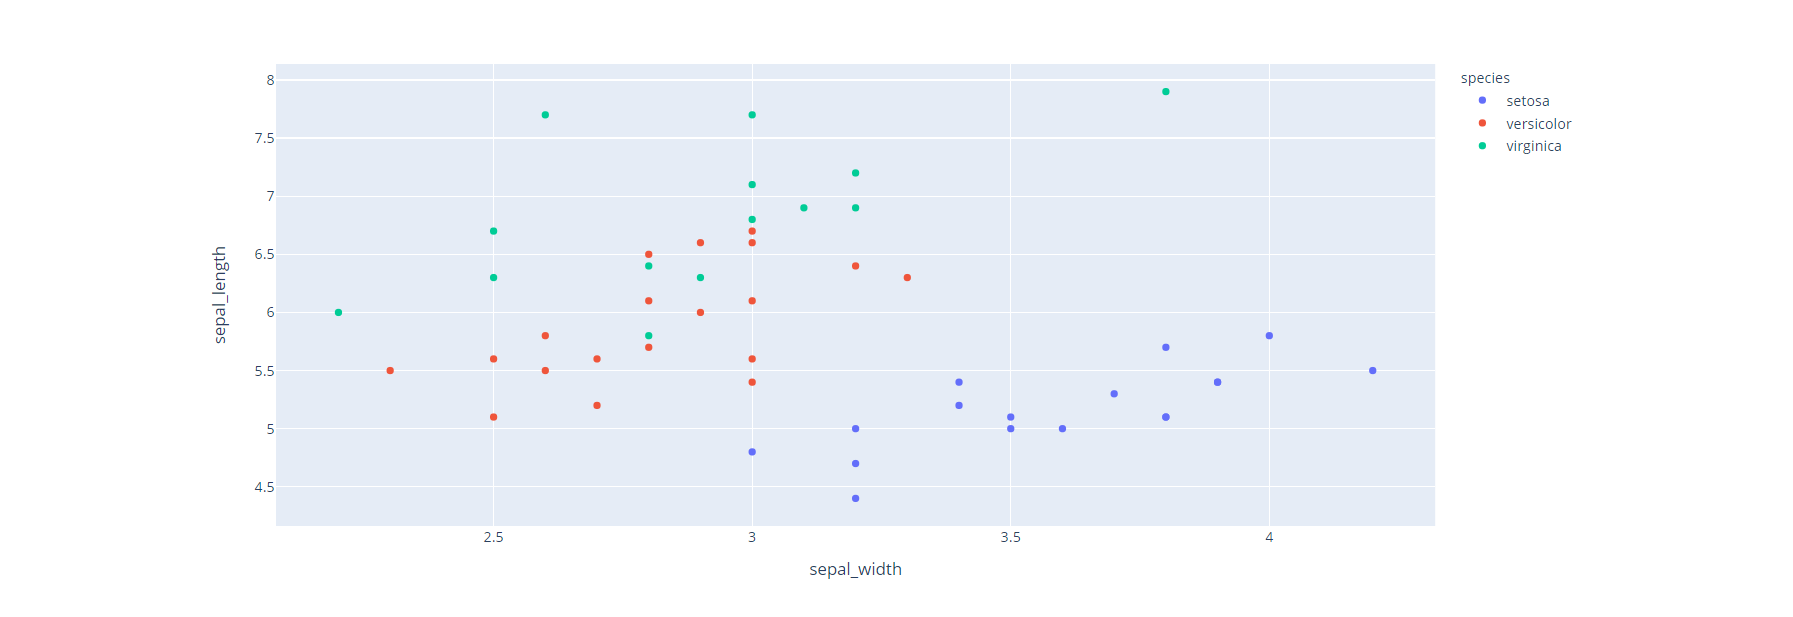

We are familiar with the Scatter plot. Consider the ``iris`` dataset. It contains records of 3 classes of iris plants, with their petal and sepal measurements.

df = px.data.iris()
df = df.sample(n=50, random_state=1)
df.head()

We want to build a scatter plot, where the x axis has sepal width, y axis sepal lenght and is colored by species. We use `px.scatter()`, its documentation is [here](https://plotly.com/python-api-reference/generated/plotly.express.scatter). 

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

You can add Marginal Histograms to your Scatter Plot, by adding  marginal_y="box", and marginal_x="box"
* In this case, it gives quick insights median, Q1, Q3, outliers for each species on sepal length and sepal width

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 marginal_y="box", marginal_x="box")
fig.show()

You can add a trend line, even if you are not predicting a number (like in this dataset, where we want to predict the flower species). The benefit of the trend line is to see overall behaviour, like variance, range, min and max, change rate.
* You just need to add `trendline='ols'` for a linear trend line. Other trend line options are found in the documentation

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 trendline="ols")
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the penguins dataset to practice with.

df_practice = sns.load_dataset('penguins').sample(n=50, random_state=1)
df_practice.head()

Feel free to try out your ideas on a scatter plot with Plotly using what you just learned

# write your code here

---

Consider the ``gapminder`` dataset. It has records on population, Gross Domestic Product, life expectancy for more than 140 countries. Each row represents a country on a given year

df = px.data.gapminder().head(500)
print(df.shape)
df.head()

You can transform your scatter plot to a bubble chart and add  Animation
* when you set the argument `size`, you create a bubble chart, where each data point has its size related to a variable. In this case we will use population
* use the argument `animation_frame` to assign marks to animation frames. In this case, we animate over the years
* X and Y axis will GDP and life expectancy
* The data points will be colored by continent, and when we hove over them, we will see the country it's related to.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Look how much information we can display in a single plot!
* In this case, we have 3 numerical variables (for x, y and size) and 3 categorical variables (year, continent and country) that allows for that

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note there is a play button, click to run the animation. There is also a stop button

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 size="pop",
                 color="continent", hover_name="country",
            )

fig.show()

You might had the sensation that is nice to see the bubbles moving around, but you can't make much sense of it. We need to set additional parameters
* The issues rely on the sizes and their positions on the plot.
* we set `size_max=55`, so we get bigger circles (there is no rule for 55, it is trial and error)
* The x axis has a wide range; we can compare levels better over a large range of values when it is in log scale, so we add `log_x=True`
* We set in a list [min, max] the x and y range limits with range_x and range_y. You will find a suitable number for min and max using trial and error 


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%209-%20Well%20done.png"> Now it is clear to see how continents changed their GDP, life expectancy, and population levels over time.

fig = px.scatter(df, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 size="pop",size_max=55, 
                 color="continent", hover_name="country",
                 log_x=True, range_x=[100,100000], range_y=[25,90]
            )

fig.show()

Again, you can facet your plot if you wish to view individualized animated scatter plots.
* This visualization is in fact very powerful. Reflect for a moment the meaning of it when you consider the GPD level, life expectancy and population across different countries. How similar and different are the patterns among them?

fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=30, range_x=[100,100000], range_y=[25,90])
fig.show()

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">  Animation Side Note

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In fact, you can animate almost all of the plots we are presenting in this lesson: histograms, boxplots, bar plot, scatter plot, maps etc. It requires having your data in good shape for adding animation. To validate, just look for the ``animation_frame`` argument in the studied functions.




<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">Typically you will be interested to animate your data when:
  * there is a time/date component, like year, month, day, weekday etc. 
  * Or when you have a categorical variable that you are interested in checking the behaviour across its levels in a dynamic and animated way.

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scatter Plot 3D

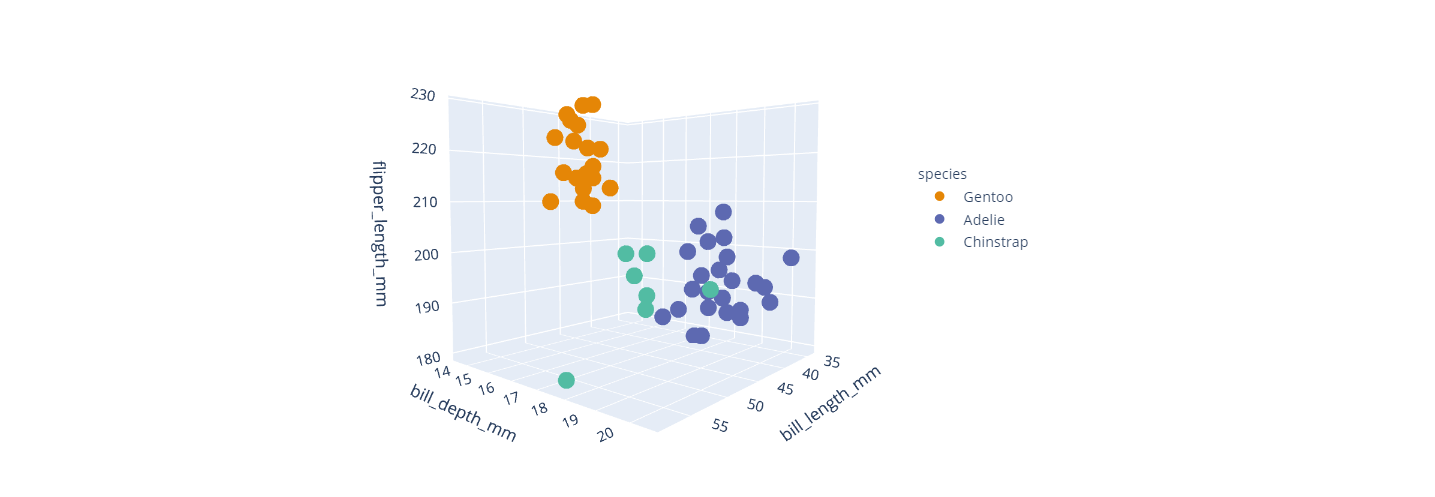

Consider the dataset
* It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head()

We are interested in creating a 3D scatter plot.


Notice that the color variable is categorical in this example. That will create a discrete color sequence
* As we studied in a previous notebook, the color aspect can be managed with `color_discrete_sequence` argument. You can check the possible arguments with the command `px.colors.qualitative.swatches()`

px.colors.qualitative.swatches()

We create a 3D scatter plot with px.scatter_3d(). The documentation is found [here](https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d.html). The arguments are x, y and x for the axis coordinates, color to set the color for data points. color_discrete_sequence defines color palette

fig = px.scatter_3d(df, x="bill_length_mm", y="bill_depth_mm", z="flipper_length_mm",
                    color='species',
                    color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

---

Lets us consider another dataset now
* It contains records of 3 classes of iris plants, with its petal and sepal measurements

df = px.data.iris()
df = df.sample(n=50, random_state=1)
df.head()

The use case now is different, we will use a continious variable to color the plot: `petal_length` 


That will create a scale with a range of colors. You can set the colors with `color_continuous_scale` argument 
* The options for this argument can be found with the command: `px.colors.sequential.swatches() `

px.colors.sequential.swatches()

We picked 'ice'


fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
                    color='petal_length',color_continuous_scale='ice')
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**:  Do a 3D Scatter plot for iris using 3 numerical variables and color by species
* Task: Can you see patterns among the variables to see regions that are more typical from a given class? Also, is there a region where the classes are mixed/mingled?

# write your code here

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scatter Matrix

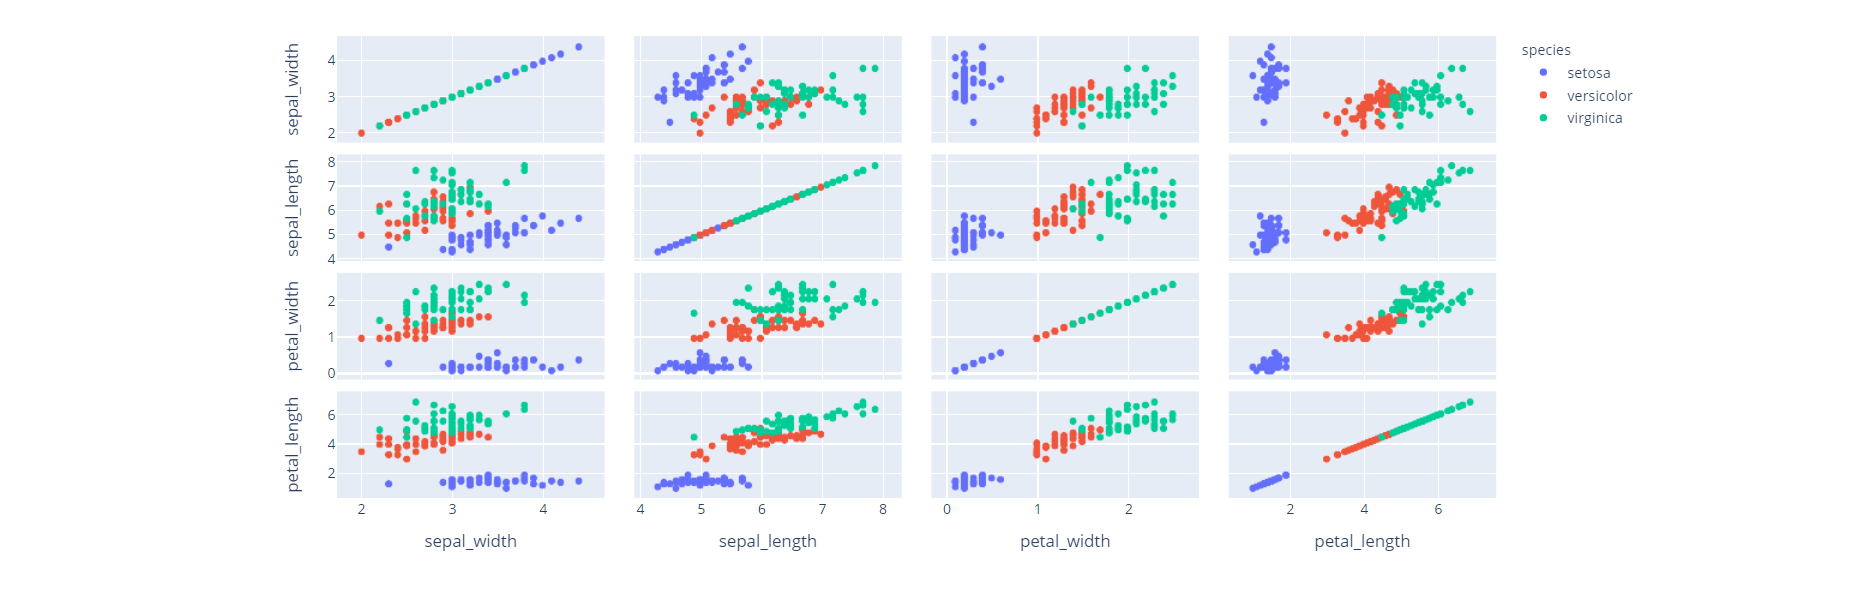

 Similar to Pairplot from Seaborn, we can use a Scatter matrix in Plotly with `px.scatter_matrix()`, its documentation is [here](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_matrix.html). For a basic plot, we have to provide the following arguments: `data_frame` for the data, `dimensions` for the columns you want to plot, and `color`, so you distinguish visually the dots in the plot. 
 * One downside is that this figure shows repeated information, since the upper triangle has the same information from the lower triangle
 * A upside is that we can interactively select datapoints in a given plot (for example, select few data points on sepal_width x sepal_length plot), and the same datapoints will be highlighted on the other plots.

df = sns.load_dataset('iris')
fig = px.scatter_matrix(data_frame=df,
                        dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
                        color="species",
                        )
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the penguins dataset to practice with.

df_practice = sns.load_dataset('penguins')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head()

You are interested in using a pair plot. You decide on doing multiple plots, using color as the categorical variables (species, island, sex) 

# write your code here

# write your code here

# write your code here

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Parallel Plots

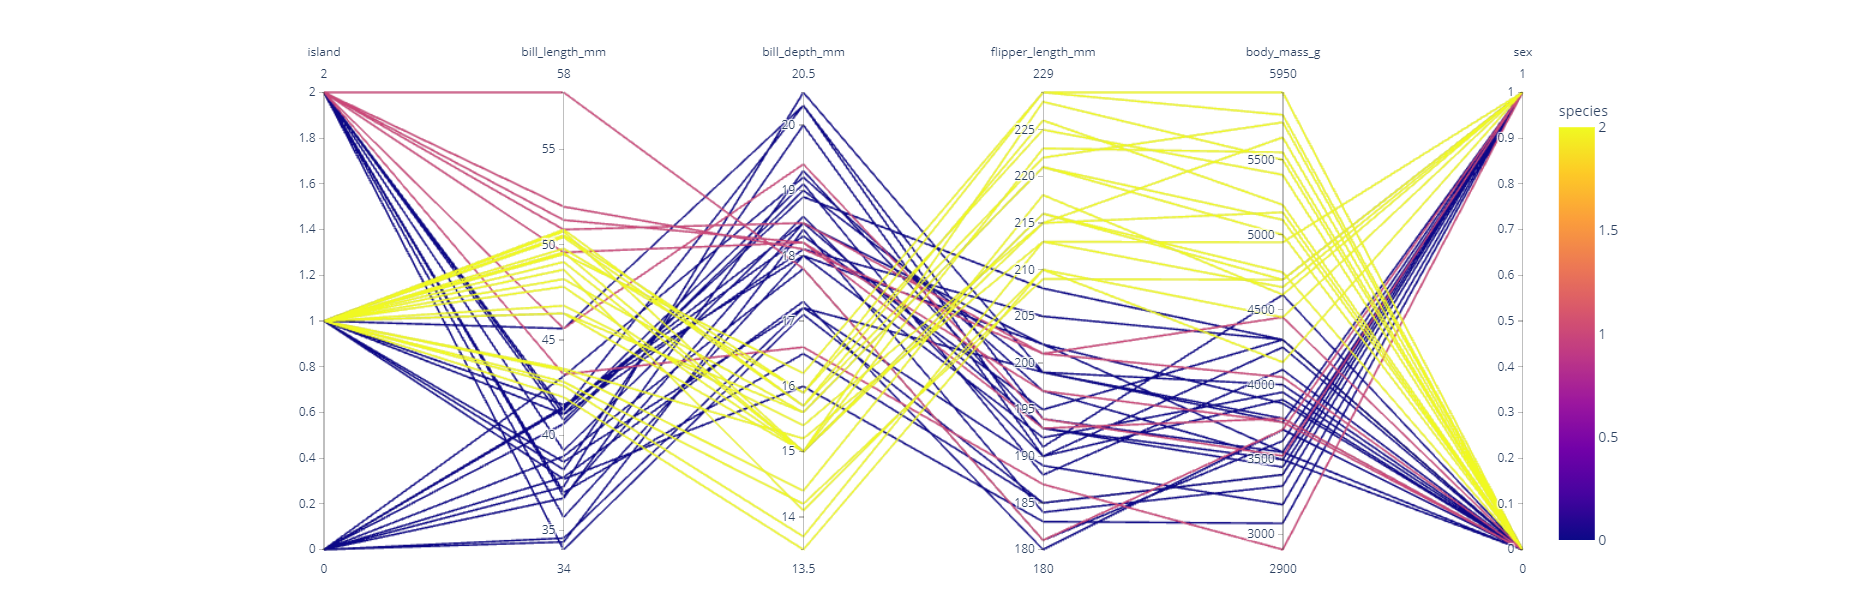

* In a Parallel Coordinates plot, each observation of the DataFrame is a polyline mark which goes through a set of parallel axes, where each axes is a **numerical variable**
* It is useful when you are interested in revealing patterns of the relationships between numerical variables.

Consider the dataset
* It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head(3)

We convert categorical to numerical with `.replace()`
* You should know in advance the category levels you want to replace, for example, sex has Female and Male, species has Adelie, Chinstratp and Gentoo etc

df['species'] = df['species'].replace({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
df['sex'] = df['sex'].replace({'Male':0, 'Female':1})
df['island']= df['island'].replace({'Torgersen':0, 'Biscoe':1, 'Dream':2})
df.head(3)

We use `px.parallel_coordinates()`, its documentation is [here](https://plotly.com/python-api-reference/generated/plotly.express.parallel_coordinates.html). We parse the dataset, the columns we want to see in the plot and color.
* Note we parsed a list of the columns we want to see in the plot. We don't want to see 'species', since that will be the color.
* Note the plot is colored by `species`, so we are interested to see patterns for species across the variables.
* note for `island` 0 (Torgersen), there is only `species` 0 (Adelie)
* note higher levels for `flipper_length_mm` appear in `species` 2 (Gentoo), and lower levels fot `bill_length_mm` happens more often on species 0 (Adelie)

fig = px.parallel_coordinates(df, color="species",
                              dimensions = ['island','bill_length_mm','bill_depth_mm',
                                            'flipper_length_mm',	'body_mass_g',	'sex'])
fig.show()

We colored the plot by `species`, which is now a numerical variable. Check the potential colors style to use in this case

px.colors.sequential.swatches() 

We picked `'viridis'` for the color

fig = px.parallel_coordinates(df, color="species", color_continuous_scale='viridis')
fig.show()

---

If your data has more categorical variables or you are only interested to conduct an analysis with categorical variables, it may be more effective to use `px.parallel_coordinates()`, so you don't have to add the effort of converting from categorical to numerical. Its documentation is [here](https://plotly.com/python-api-reference/generated/plotly.express.parallel_categories.html)


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> The only aspect is that your **`color` variable should be numerical**. In case this variable is already a number, no additional steps are needed. In case it is a category, you will need to convert it
* In our exerise, ``survived`` is already a number (even though it represents a category)

df = sns.load_dataset('titanic').drop(['alive'],axis=1).sample(n=200, random_state=1).reset_index(drop=True)
print(df.shape)
df.head(3)

You will notice only categorical variables, all numerical are disconsidered
* This plot is useful since you can see the proportions on each variable's level (for example, there were more males than females, but more females survided than males)
* Note we didn't parse dimensions, so we allowed the plot to include all possible variables, including survived (which is the color variable). This is also fine. When you are not sure on which variables to plot at first, you plot all then refine.

fig = px.parallel_categories(df, color="survived", color_continuous_scale='viridis')
fig.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below, which uses the gapminder dataset to practice with.

df_practice = px.data.gapminder()
df_practice = df_practice.sample(n=100, random_state=1).reset_index(drop=True)
df_practice.head()

We map the continents to numbers

continent_map = {'Asia':0, 'Europe':1, 'Africa':2,'Americas':3, 'Oceania':4}
df_practice['continent'] = df_practice['continent'].replace(continent_map)
df_practice.head()

 First, just a quick recap on the continent_map

continent_map

Make a parallel coordinates with dimensions as ['continent','lifeExp',	'pop',	'gdpPercap' ] ,colored by continent.
* What are the patterns that you see? Where typically do we have a larger population, life expectancy or gdp per cap?

# write code here

---